In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# STEP 1

df = pd.read_csv('/content/drive/MyDrive/hour.csv')
print(df.head())

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


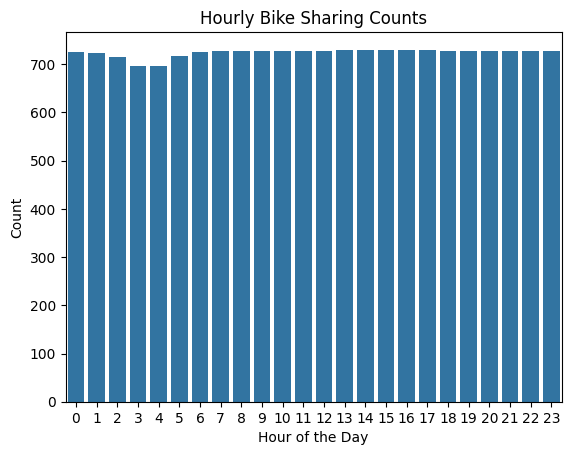

In [17]:
sns.countplot(x='hr', data=df)
plt.title('Hourly Bike Sharing Counts')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.show()

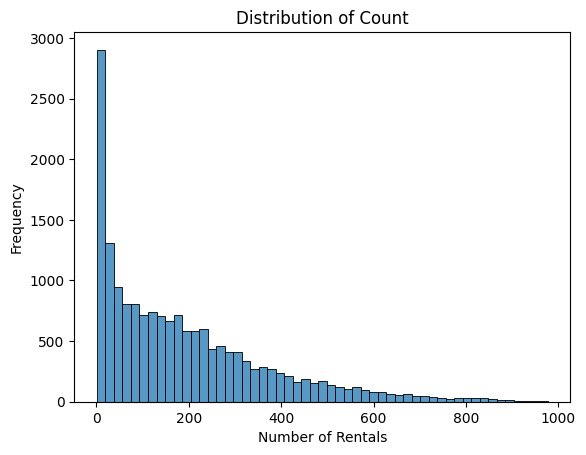

In [18]:
sns.histplot(df['cnt'])
plt.title('Distribution of Count')
plt.xlabel('Number of Rentals')
plt.ylabel("Frequency")
plt.show()

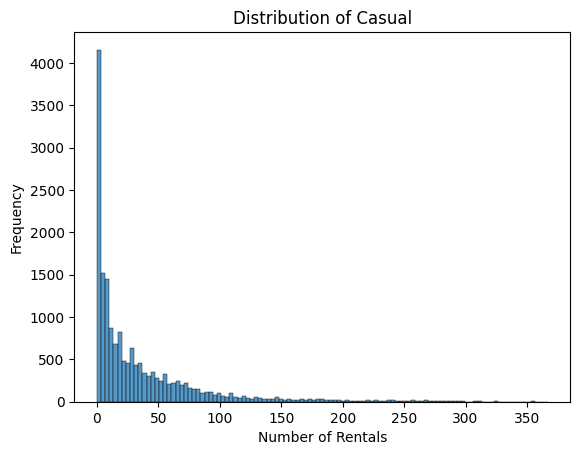

In [19]:
sns.histplot(df['casual'])
plt.title('Distribution of Casual')
plt.xlabel('Number of Rentals')
plt.ylabel("Frequency")
plt.show()

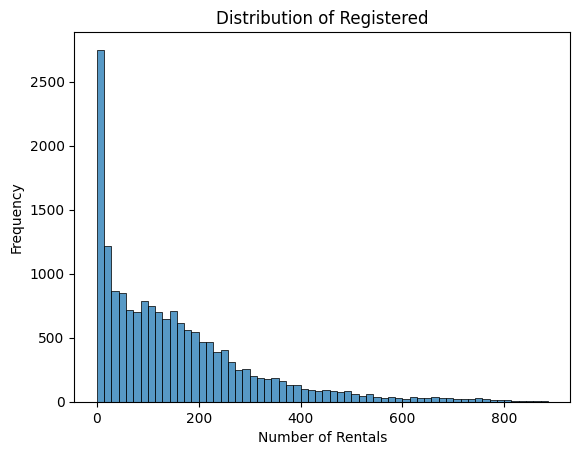

In [20]:
sns.histplot(df['registered'])
plt.title('Distribution of Registered')
plt.xlabel('Number of Rentals')
plt.ylabel("Frequency")
plt.show()

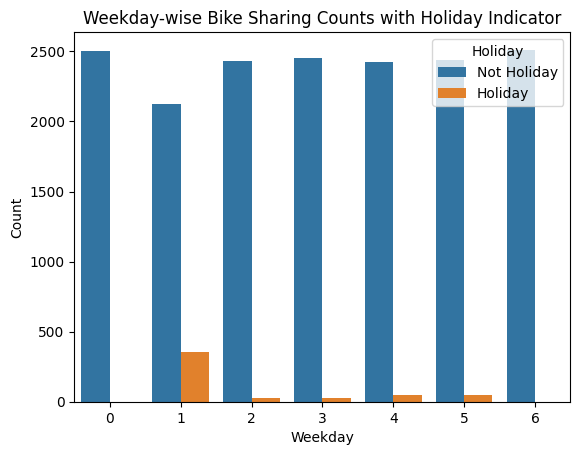

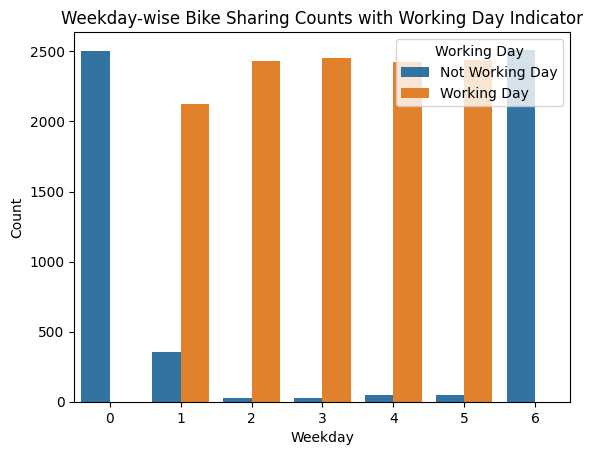

In [22]:
sns.countplot(x='weekday', data=df, hue='holiday')
plt.title('Weekday-wise Bike Sharing Counts with Holiday Indicator')
plt.xlabel('Weekday')
plt.ylabel('Count')
plt.legend(title='Holiday', loc='upper right', labels=['Not Holiday', 'Holiday'])
plt.show()

sns.countplot(x='weekday', data=df, hue='workingday')
plt.title('Weekday-wise Bike Sharing Counts with Working Day Indicator')
plt.xlabel('Weekday')
plt.ylabel('Count')
plt.legend(title='Working Day', loc='upper right', labels=['Not Working Day', 'Working Day'])
plt.show()

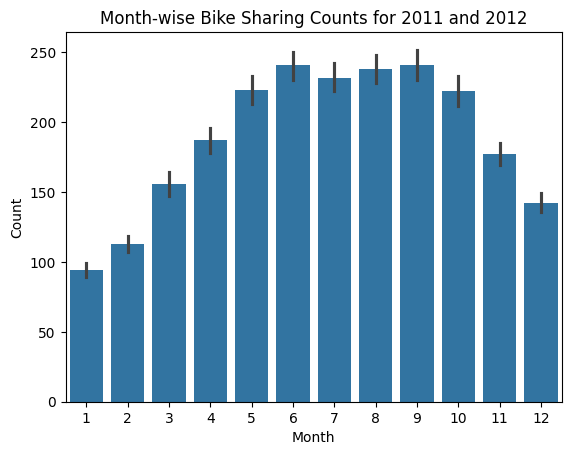

In [23]:
sns.barplot(x='mnth', y='cnt', data=df)
plt.title('Month-wise Bike Sharing Counts for 2011 and 2012')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

<ipython-input-27-7a46b4bdb378>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


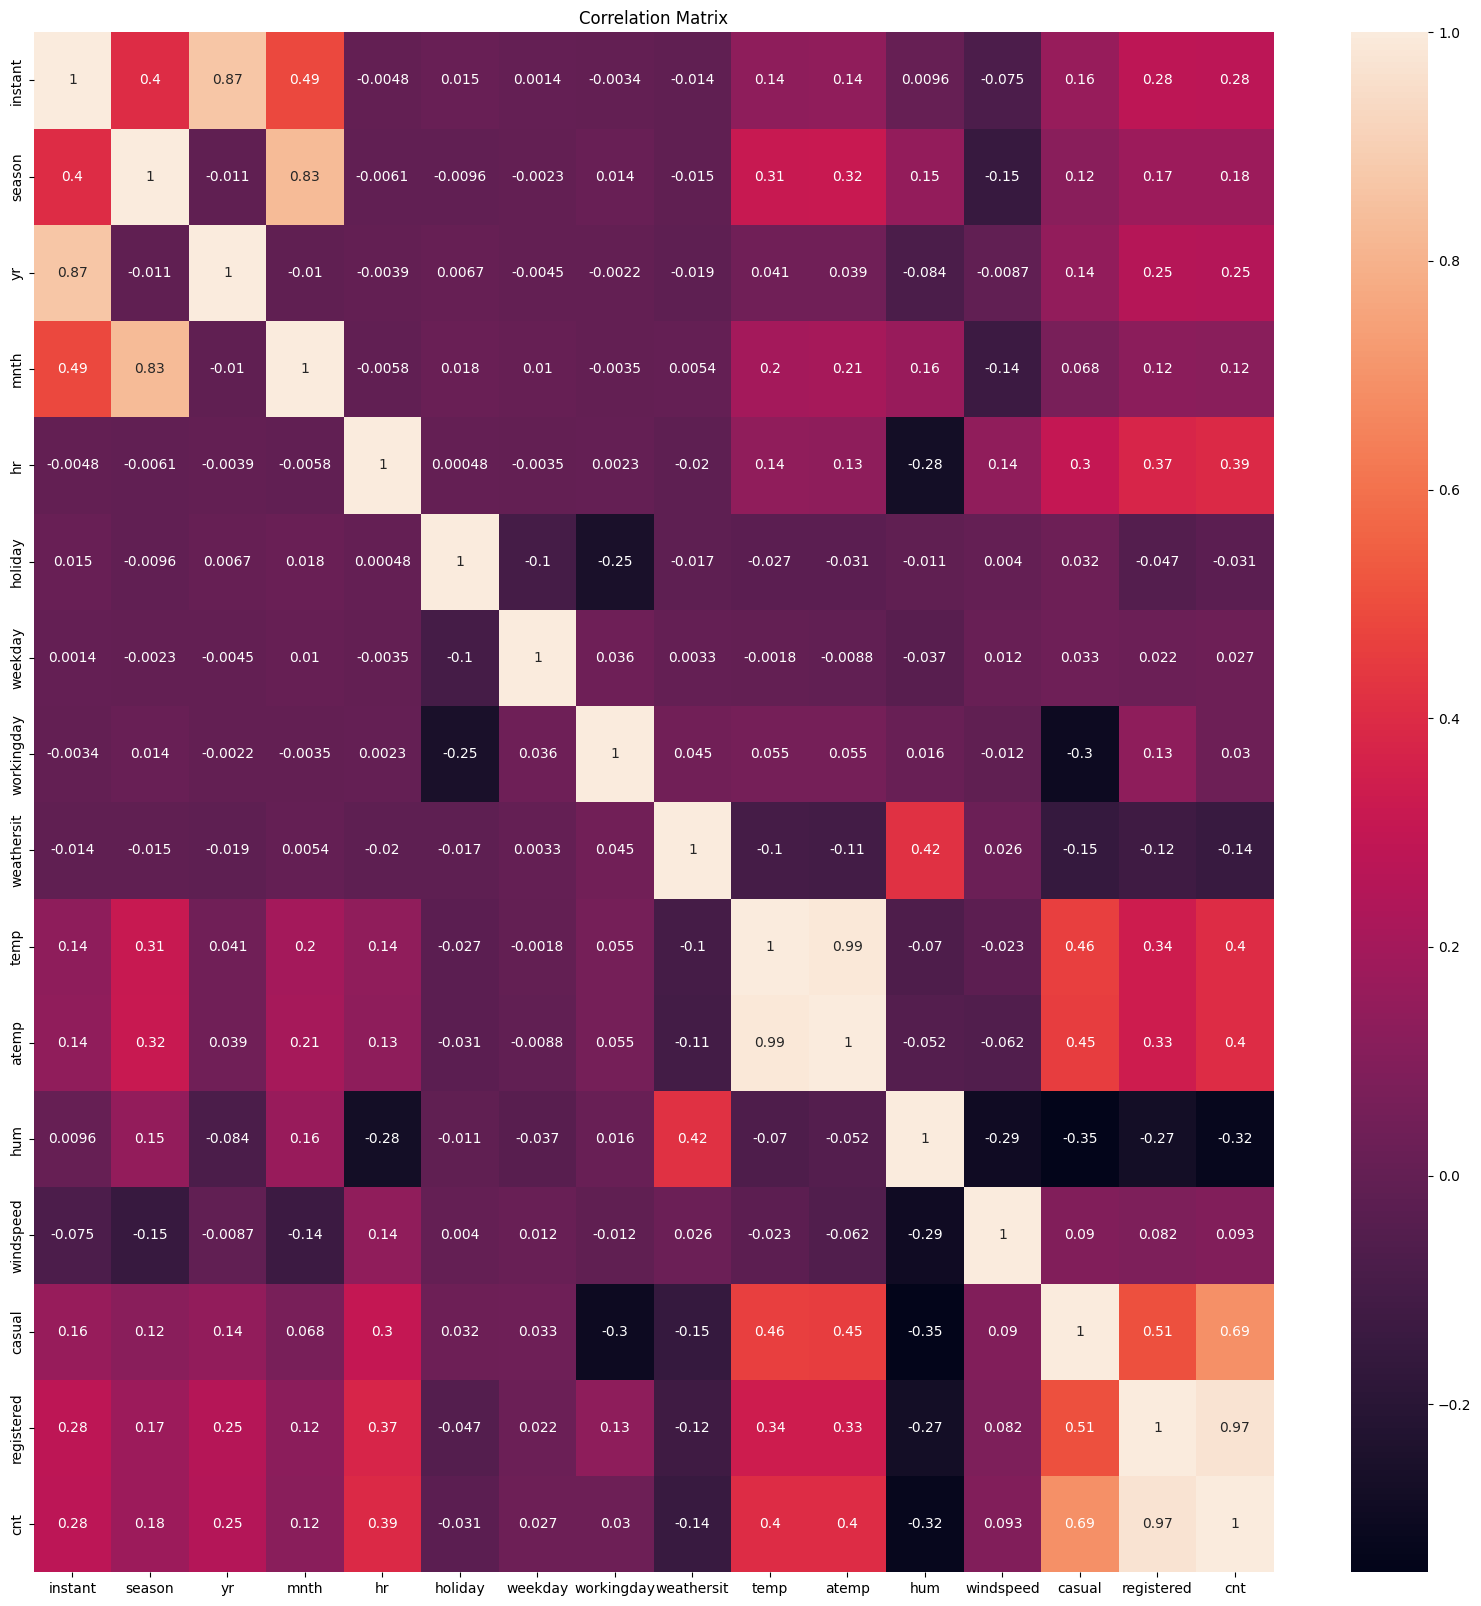

In [27]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# STEP 2

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
categorical_columns = ['season','hr','yr','mnth','holiday','weekday','workingday','weathersit']
continuous_columns = ['temp','atemp','hum','windspeed']

scaler = MinMaxScaler()
encoder = OneHotEncoder(sparse=False)

x_scaled = scaler.fit_transform(df[continuous_columns])
x_encoded = encoder.fit_transform(df[categorical_columns])

x_combined = pd.concat([pd.DataFrame(x_scaled),pd.DataFrame(x_encoded)],axis=1)
y_train = df['cnt']

X_train, X_test, y_train, y_test = train_test_split(x_combined, y_train, test_size = 0.2, random_state = 42)

In [ ]:
# STEP 3:

from scipy.linalg import lstsq

X_linear = df[['temp','atemp','hum','windspeed']].values
y_linear = df['cnt'].values

X_linear = np.column_stack((np.ones(len(X_linear)),X_linear))

theta, residuals, rank, s = lstsq(X_linear,y_linear)

print('Coefficients (Theta):',theta)

Coefficients (Theta): [ 161.80690219   85.57649678  314.34292899 -275.18031254   42.97925525]


In [ ]:
# STEP 4:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

linear_model = LinearRegression()

linear_model.fit(X_train,y_train)
y_pred = linear_model.predict(X_test)

mse = mean_squared_error(y_test,y_pred)
print('Mean Squared Error: ',mse)

r2 = r2_score(y_test,y_pred)
print('R2 Score: ',r2)

Mean Squared Error:  10091.2575158
R2 Score:  0.681316076756


In [ ]:
# POLYNOMIAL REGRESSION FOR TRAINING DATA & TESTING DATA

poly_features = PolynomialFeatures(degree=2,include_bias=False)
y = df['cnt']

x_transformed_poly = poly_features.fit_transform(x_combined)

X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(x_transformed_poly, y, test_size = 0.2, random_state = 42)

poly_model = LinearRegression()
poly_model.fit(X_train_poly,y_train_poly)

y_train_pred_poly = poly_model.predict(X_train_poly)
y_test_pred_poly = poly_model.predict(X_test_poly)

mse_poly = mean_squared_error(y_test_poly,y_test_pred_poly)
r2_train_poly = r2_score(y_train_poly,y_train_pred_poly)
print('R2 SCORE FOR TRAINING DATA: ',r2_train_poly)

r2_test_poly = r2_score(y_test_poly,y_test_pred_poly)
print('R2 SCORE FOR TESTING DATA: ',r2_test_poly)

R2 SCORE FOR TRAINING DATA:  0.928463382109
R2 SCORE FOR TESTING DATA:  -2.64388682143e+18


In [ ]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
rdg = Ridge(alpha = 0.4)
lso = Lasso(alpha = 0.4)
eln = ElasticNet(alpha = 0.1, l1_ratio = 0.5)

In [ ]:
# RIDGE REGULARIZATION

rdg.fit(X_train_poly,y_train_poly)
y_pred = rdg.predict(X_test_poly)

mse = mean_squared_error(y_test_poly,y_pred)
print('MSE: ',mse)

r2 = r2_score(y_test_poly,y_pred)
print('R2 SCORE: ',r2)

MSE:  2683.4013491
R2 SCORE:  0.915257650672


In [ ]:
# LASSO REGULARIZATION

lso.fit(X_train_poly,y_train_poly)
y_pred = lso.predict(X_test_poly)

mse = mean_squared_error(y_test_poly,y_pred)
print('MSE: ',mse)

r2 = r2_score(y_test_poly,y_pred)
print('R2 SCORE: ',r2)

MSE:  4387.25493588
R2 SCORE:  0.861449614873


In [ ]:
# ELASTIC REGULARIZATION

eln.fit(X_train_poly,y_train_poly)
y_pred = eln.predict(X_test_poly)

mse = mean_squared_error(y_test_poly,y_pred)
print('MSE: ',mse)

r2 = r2_score(y_test_poly,y_pred)
print('R2 SCORE: ',r2)

MSE:  6715.62832738
R2 SCORE:  0.787919119192
